# Import & Configurations

In [1]:
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -O ./spark-3.3.1-bin-hadoop3.tgz  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
# !tar zxvf ./spark-3.3.1-bin-hadoop3.tgz
# !pip install findspark

In [2]:
# import os

# os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/openjdk"
# os.environ["SPARK_HOME"] = "/Users/ronibendom/Downloads/spark-3.3.1-bin-hadoop3"

In [3]:
#setting up Kaggle
# !pip install kaggle
import json

# !mkdir /Users/ronibendom/.kaggle
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username": "yonatanron", "key": "f237c8b6d384b04f375f53d8dc439101"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/Users/ronibendom/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 kaggle.json

In [4]:
import findspark
import random
findspark.init()

In [5]:
# Other imports
import numpy as np
import pandas as pd
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import avg, min, asc, desc


# Warm up

In [6]:
def average(num_list: list) -> int:
    """
    This function get a list of numbers and returns the average of the list of numbers
    input:
        num_list: list contains integer values
    output:
        return the average of the list
    """
    # Your code here
    return np.mean(num_list)

In [7]:
# When running this cell your code should not return any assert errors

assert average([1,2,3]) == 2

# HW 2- PySpark Exercises
During this Homework you should use only PySpark RDD, you should not use PySpark DataFrame in your solutions

In [8]:
sc = pyspark.SparkContext("local", appName="HW2")

22/12/30 18:51:11 WARN Utils: Your hostname, Ronis-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.28 instead (on interface en0)
22/12/30 18:51:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/30 18:51:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## RDD Start Questions

### Create RDD from list

In [9]:
def rdd_from_list(sc: SparkContext, n: int) -> RDD:  
    """
    This function gets the number n and returns a rdd consisting of elements from 1 to n.
    Assume that n > 1, no need for any exeption on that manner.
    input:
        sc: spark context
        n: the top number in the generated rdd. For example, if n=3 the rdd created should be [1,2,3]
    output:
        returns a rdd consisting of elements from 1 to n (includes n).
    """
    list_for_rdd = np.arange(1, n+1)
    rdd = sc.parallelize(list_for_rdd)
    return rdd

In [10]:
# When running this cell your code should not return any assert errors

# collect() method returns all elements in a RDD to the driver as a local list
print(rdd_from_list(sc, 10).collect())

result_rdd = rdd_from_list(sc, 3)

assert isinstance(result_rdd, RDD)
assert result_rdd.collect() == [1, 2, 3]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Using key-value tuple, square all the values.
You can assume that the key is str (String) type and the value is int (integer) type

In [11]:
def square_list(sc: SparkContext, pair_list: list) -> list:
    """
    This function gets pair of tuples and returns a list with squre values
    input:
        sc: spark context
        pair_list: a pair key-value tuple that contain string as a key and integer as a value 
    output:
        return a list of key and square values of the original list
    """

    rdd = sc.parallelize(pair_list)
    rdd2 = rdd.map(lambda x: (x[0], x[1] ** 2))
    return rdd2.collect()

In [12]:
# When running this cell your code should not return any assert errors

pair_list = [('a', 1), ('b', 2), ('c', 3)]
assert square_list(sc, pair_list) == [('a', 1), ('b', 4), ('c', 9)]

### Alter Matrix


Assume we have a rdd containing only lists of 2 elements:

```
matrix = [[1,5], [2,10], [3,14]]
matrix_rdd = sc.parallelize(matrix)
```

This data structure is like a matrix.

Create an operation `alter_matrix()` which adding to the first column (or first coordinate of each element) of the matrix by 1, and integer divide 5 from the second column (second coordinate).

In [13]:
sc.parallelize([[1,3], [2,9]]).map(lambda row: row[0]).collect()

[1, 2]

In [14]:
def alter_matrix(sc: SparkContext, matrix: RDD) -> list:
    """
    This function adds 1 for the first column, and integer divide 5 from the second column 
    input:
        sc: spark context
        matrix: a RDD that contain data a list in length of two.
    output:
        return a RDD adding 1 for the first column and integer divide 5 from the second column of the input RDD
    """
    rdd2 = matrix.map(lambda x: [x[0] + 1, x[1] // 5])
    return rdd2

In [15]:
matrix = [[1,5], [2,10], [3,14]]
matrix_rdd = sc.parallelize(matrix)
result_rdd = alter_matrix(sc, matrix_rdd)

assert isinstance(result_rdd, RDD)
assert result_rdd.collect() == [[2, 1], [3, 2], [4, 2]]

### Gets even numbers
Assume we have a RDD containin integer numbers.
Create a function `gets_even()` which returns all the even numbers in the RDD.

In [16]:
def gets_even(sc: SparkContext, number_rdd: RDD) -> list:
    """
    This function gets rdd and return only even numbers from the given rdd
    input:
        sc: spark context
        number_rdd: a RDD that contain data of integer numbers
    output:
        return a RDD that contain only even numbers
    """
    return number_rdd.filter(lambda x: x % 2 == 0)

In [17]:
numbers = [i for i in range(1, 10)]
numbers_rdd = sc.parallelize(numbers)
result_rdd = gets_even(sc, numbers_rdd)

assert isinstance(result_rdd, RDD)
assert result_rdd.collect() == [2,4,6,8]

### Page Rank algorithm


The PageRank algorithm assigns a real number to each page on the web (or the portion of the web that has been crawled and its links discovered). This number is meant to indicate how "important" the page is.<br> Hadoop was initially developed for Apache Nutch, an open-source web search engine, and one of the first uses of Big Data technologies and MapReduce was to index millions of webpages. In this application, we will explore an implementation of the iterative PageRank algorithm using Spark.

We will deal with a more simplifed web system. Assume we have four web pages (A,B,C,D), the following graph shows outbound links from one web page to another (the arrow indicate the flow)<br>
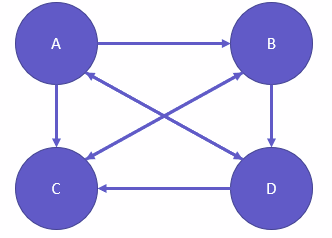

Generate a web system as an RDD of pair tuples (page name, neighbor page name) from a pair rdd (page name, list of all neighbors)
Hint: check out for pair rdd opearations such as, `mapValues` or `flatMapValues`. [Spark reference](https://spark.apache.org/docs/2.2.0/api/python/pyspark.html#pyspark.RDD)

In [18]:
def map_websystem_rdd(sc: SparkContext, neighbor_rdd: RDD) -> RDD:
    """
    This function gets input web system as rdd and mapping rdd of the system.
    And returns the mapping of the connection between each two web pages
    input:
        sc: spark context
        neighbor_rdd: a pair RDD of the web system contain each web and its links (web page, list of neighbor pages)
    output:
        return a pair RDD that contain all links (web page, neighbor web page)
    """
    return neighbor_rdd.flatMapValues(lambda x: x)

In [19]:
neighbor_rdd = sc.parallelize([
                ('a', ['b','c','d']),
                ('c', ['b']), 
                ('b', ['c','d']), 
                ('d', ['a','c'])
              ])

In [20]:
result = map_websystem_rdd(sc, neighbor_rdd).collect()

In [21]:
assert result == [
                    ('a', 'b'), ('a', 'c'), ('a', 'd'), 
                    ('c', 'b'), 
                    ('b', 'c'), ('b', 'd'), 
                    ('d', 'a'), ('d', 'c')
                ]

## Kaggle dataset analysis

You can choose whatever data set you like from Kaggle and you need to derive meanigful insights using the Pyspark Dataframe API.
You need to use at least once from the following [DataFrame API](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.html#pyspark.sql.DataFrame):

*   [show](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.show.html#pyspark.sql.DataFrame.show)
*   [printSchema](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.printSchema.html#pyspark.sql.DataFrame.printSchema)
*   [distinct](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.distinct.html#pyspark.sql.DataFrame.distinct)
*   [filter](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.filter.html#pyspark.sql.DataFrame.filter)
*   [foreach](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.foreach.html#pyspark.sql.DataFrame.foreach)
*   [join](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.join.html#pyspark.sql.DataFrame.join)
*   [orderBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.orderBy.html#pyspark.sql.DataFrame.orderBy)
*   [sample](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.sample.html#pyspark.sql.DataFrame.sample)
*   [select](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.select.html#pyspark.sql.DataFrame.select)
*   [subtract](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.subtract.html#pyspark.sql.DataFrame.subtract)
*   [where](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.where.html#pyspark.sql.DataFrame.where)
*   [withColumn](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html#pyspark.sql.DataFrame.withColumn)
*   [withColumnRenamed](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.withColumnRenamed.html#pyspark.sql.DataFrame.withColumnRenamed)

In addition use at least once of the following [functions](https://spark.apache.org/docs/3.1.1/api/python/reference/pyspark.sql.html#functions):
*   [array_contains](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.array_contains.html#pyspark.sql.functions.array_contains)
*   [avg](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.avg.html#pyspark.sql.functions.avg)
*   [collect_set](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.collect_set.html#pyspark.sql.functions.collect_set)
*   [countDistinct](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.countDistinct.html#pyspark.sql.functions.countDistinct)
*   [datediff](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.datediff.html#pyspark.sql.functions.datediff)
*   [min](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.min.html#pyspark.sql.functions.min)
*   [regexp_extract](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.regexp_extract.html#pyspark.sql.functions.regexp_extract)
*   [window](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.window.html?highlight=window)





In [22]:
# !kaggle datasets download -d vivovinco/nba-player-stats -p ./datasets/
# !unzip ./datasets/nba-player-stats.zip -d ./datasets/nba-player-stats/

In [23]:
POINTS_LOWER_BOUND = 5
TEAM_CODE = 'MIA'
NEW_COLUMN = 'Aggregated_Score'

In [24]:
# Start a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the data into pandas dataframes, regular_season and playoffs_season
pandas_regular_season_df = pd.read_csv('./datasets/nba-player-stats/2021-2022 NBA Player Stats - Regular.csv', encoding="Windows-1252", delimiter=";")
pandas_playoffs_season_df = pd.read_csv('./datasets/nba-player-stats/2021-2022 NBA Player Stats - Playoffs.csv', encoding="Windows-1252", delimiter=";")

# Convert the pandas dataframes to Spark dataframes get only distinct.
spark_regular_season_df = spark.createDataFrame(pandas_regular_season_df)
spark_playoffs_season_df = spark.createDataFrame(pandas_playoffs_season_df)

# Rename all the columns because the tables have the same name it will simplify(clear wise) the join later.
for col in pandas_playoffs_season_df.columns:
  spark_playoffs_season_df = spark_playoffs_season_df.withColumnRenamed(col, f"{col}_off")

# Join the two dataframes on the "Player" and "Tm" columns
spark_all_season_df = spark_regular_season_df.join(spark_playoffs_season_df, (spark_regular_season_df.Player == spark_playoffs_season_df.Player_off) & (spark_regular_season_df.Tm == spark_playoffs_season_df.Tm_off), "inner")



In [25]:
print('Print the result schema from the join operation')
spark_all_season_df.printSchema()

Print the result schema from the join operation
root
 |-- Rk: long (nullable = true)
 |-- Player: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Tm: string (nullable = true)
 |-- G: long (nullable = true)
 |-- GS: long (nullable = true)
 |-- MP: double (nullable = true)
 |-- FG: double (nullable = true)
 |-- FGA: double (nullable = true)
 |-- FG%: double (nullable = true)
 |-- 3P: double (nullable = true)
 |-- 3PA: double (nullable = true)
 |-- 3P%: double (nullable = true)
 |-- 2P: double (nullable = true)
 |-- 2PA: double (nullable = true)
 |-- 2P%: double (nullable = true)
 |-- eFG%: double (nullable = true)
 |-- FT: double (nullable = true)
 |-- FTA: double (nullable = true)
 |-- FT%: double (nullable = true)
 |-- ORB: double (nullable = true)
 |-- DRB: double (nullable = true)
 |-- TRB: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- STL: double (nullable = true)
 |-- BLK: double (nullable = true)
 |-- TOV: double

In [26]:
print('Leading scores in the regular season are:')
spark_regular_season_df.sort(spark_regular_season_df.PTS.desc()).show(truncate=False)

Leading scores in the regular season are:
22/12/30 18:51:16 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+---+-----------------------+---+---+---+---+---+----+----+----+-----+---+----+-----+---+----+-----+-----+---+----+-----+---+----+----+---+---+---+---+---+----+
|Rk |Player                 |Pos|Age|Tm |G  |GS |MP  |FG  |FGA |FG%  |3P |3PA |3P%  |2P |2PA |2P%  |eFG% |FT |FTA |FT%  |ORB|DRB |TRB |AST|STL|BLK|TOV|PF |PTS |
+---+-----------------------+---+---+---+---+---+----+----+----+-----+---+----+-----+---+----+-----+-----+---+----+-----+---+----+----+---+---+---+---+---+----+
|162|Joel Embiid            |C  |27 |PHI|68 |68 |33.8|9.8 |19.6|0.499|1.4|3.7 |0.371|8.4|15.9|0.529|0.534|9.6|11.8|0.814|2.1|9.6 |11.7|4.2|1.1|1.5|3.1|2.7|30.6|
|274|LeBron James           |SF |37 |LAL|56 |56 |37.2|11.4|21.8|0.524|2.9|8.0 |0.359|8.6|13.8|0.62 |0.59 |4.5|6.0 |0.756|1.1|7.1 |8.2 

In [27]:
# Order the rows according to the biggest diffrence between pts in the regular and in hte playoff, fitler out points below the limit(5).
diff_regular_to_off_pts = spark_all_season_df.filter((spark_all_season_df.PTS_off > POINTS_LOWER_BOUND) & (spark_all_season_df.PTS > POINTS_LOWER_BOUND)).orderBy(spark_all_season_df.PTS_off - spark_all_season_df.PTS)

In [28]:
# Display the resulting dataframe, these are the players that thier points drop during the playoff.
print('These are the players that thier points drop the most during the playoff:')
diff_regular_to_off_pts.select(diff_regular_to_off_pts.Player, diff_regular_to_off_pts.Pos, diff_regular_to_off_pts.Age, diff_regular_to_off_pts.PTS, diff_regular_to_off_pts.PTS_off).show()


These are the players that thier points drop the most during the playoff:
+-----------------+---+---+----+-------+
|           Player|Pos|Age| PTS|PTS_off|
+-----------------+---+---+----+-------+
|       Trae Young| PG| 23|28.4|   15.4|
|      Tyler Herro| SG| 22|20.7|   12.6|
|    DeMar DeRozan| PF| 32|27.9|   20.8|
|      Joel Embiid|  C| 27|30.6|   23.6|
|     John Collins| PF| 24|16.2|    9.4|
|    Fred VanVleet| PG| 27|20.3|   13.8|
| D'Angelo Russell| PG| 25|18.1|   12.0|
|     Kyrie Irving| PG| 29|27.4|   21.3|
|  Khris Middleton| SF| 30|20.1|   14.5|
|       Kyle Lowry| PG| 35|13.4|    7.8|
|  Duncan Robinson| SG| 27|10.9|    5.6|
|De'Anthony Melton| SG| 23|10.8|    5.6|
|      Patty Mills| PG| 33|11.4|    6.3|
|      Zach LaVine| SF| 26|24.4|   19.3|
|      Mike Conley| PG| 34|13.7|    9.2|
|      Bam Adebayo|  C| 24|19.1|   14.8|
|       Coby White| PG| 21|12.7|    8.4|
| Jonathan Kuminga| SF| 19| 9.3|    5.2|
|     Bobby Portis|  C| 26|14.6|   10.6|
|    Dillon Brooks| SF| 

In [29]:
# Calculate the average of the "PTS_off" column
avg_pts_off = spark_all_season_df.select(avg("PTS_off")).collect()[0][0]
print(f'''The average points in the playoff is {avg_pts_off}''')

The average points in the playoff is 8.493055555555555


In [30]:
print(f'''We would like to focous now only in the {TEAM_CODE} team''')
spark_regular_team_season_df = spark_regular_season_df.where(spark_regular_season_df.Tm == TEAM_CODE)
#spark_miami_all_season.show()

print(f'''Get sample of the players to look on: ''')
players = spark_regular_team_season_df.sample(True, fraction = 2 / spark_regular_team_season_df.count()).distinct()
players.show()

We would like to focous now only in the MIA team
Get sample of the players to look on: 
+---+-------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+
| Rk|       Player|Pos|Age| Tm|  G| GS|  MP| FG| FGA|  FG%| 3P|3PA|  3P%| 2P| 2PA|  2P%| eFG%| FT|FTA|  FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF| PTS|
+---+-------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+
|508|Javonte Smart| PG| 22|MIA|  4|  0|10.0|2.0| 4.3|0.471|1.0|2.3|0.444|1.0| 2.0|  0.5|0.588|0.0|0.0|  0.0|0.3|1.0|1.3|0.5|0.5|0.3|0.5|0.3| 5.0|
|236|  Tyler Herro| SG| 22|MIA| 66| 10|32.6|7.6|17.0|0.447|2.7|6.7|0.399|4.9|10.3|0.477|0.525|2.9|3.3|0.868|0.5|4.5|5.0|4.0|0.7|0.1|2.6|1.4|20.7|
+---+-------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+



In [31]:
#Adding new column called Aggregated_Score which is the sum of the following states below.
players_with_agg_score = players.withColumn(NEW_COLUMN, players.PTS + players.AST + players.BLK + players.DRB + players.ORB + players.STL + players.BLK)
players_with_agg_score.show()

+---+-------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+------------------+
| Rk|       Player|Pos|Age| Tm|  G| GS|  MP| FG| FGA|  FG%| 3P|3PA|  3P%| 2P| 2PA|  2P%| eFG%| FT|FTA|  FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF| PTS|  Aggregated_Score|
+---+-------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+------------------+
|508|Javonte Smart| PG| 22|MIA|  4|  0|10.0|2.0| 4.3|0.471|1.0|2.3|0.444|1.0| 2.0|  0.5|0.588|0.0|0.0|  0.0|0.3|1.0|1.3|0.5|0.5|0.3|0.5|0.3| 5.0|7.8999999999999995|
|236|  Tyler Herro| SG| 22|MIA| 66| 10|32.6|7.6|17.0|0.447|2.7|6.7|0.399|4.9|10.3|0.477|0.525|2.9|3.3|0.868|0.5|4.5|5.0|4.0|0.7|0.1|2.6|1.4|20.7|              30.6|
+---+-------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+------------------+



In [32]:
print(f'''{TEAM_CODE} without the sampled ones from the above: ''')
spark_regular_team_season_df.subtract(players).show()

MIA without the sampled ones from the above: 
+---+-----------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+----+---+---+---+---+---+----+
| Rk|           Player|Pos|Age| Tm|  G| GS|  MP| FG| FGA|  FG%| 3P|3PA|  3P%| 2P| 2PA|  2P%| eFG%| FT|FTA|  FT%|ORB|DRB| TRB|AST|STL|BLK|TOV| PF| PTS|
+---+-----------------+---+---+---+---+---+----+---+----+-----+---+---+-----+---+----+-----+-----+---+---+-----+---+---+----+---+---+---+---+---+----+
|131|   Dewayne Dedmon|  C| 32|MIA| 67| 15|15.9|2.4| 4.3|0.566|0.3|0.7|0.404|2.2| 3.6|0.597|0.598|1.1|1.5| 0.75|1.6|4.2| 5.8|0.7|0.4|0.6|1.0|2.6| 6.3|
|517|     Nik Stauskas| SG| 28|MIA|  2|  0|12.0|1.5| 4.0|0.375|1.0|2.0|  0.5|0.5| 2.0| 0.25|  0.5|1.5|2.0| 0.75|0.5|1.0| 1.5|0.5|0.0|0.0|0.0|0.5| 5.5|
|556|     Gabe Vincent| PG| 25|MIA| 68| 27|23.4|3.1| 7.5|0.417|1.8|4.8|0.368|1.4| 2.8|  0.5|0.533|0.6|0.8|0.815|0.3|1.5| 1.9|3.1|0.9|0.2|1.4|2.3| 8.7|
|212|         Kyle Guy| SG| 24|MIA| 19|  0| 9.8|

In [33]:
# get min point on the team
minPts = spark_regular_team_season_df.select(min("PTS").alias("min_pts"))
# get the player with the min points
minPtsPlayer = spark_regular_team_season_df.join(minPts, minPts.min_pts == spark_regular_team_season_df.PTS).select("Player").first()[0]

print(f"From the {TEAM_CODE} the player who has the min avg points is {minPtsPlayer}")

From the MIA the player who has the min avg points is Marcus Garrett


In [34]:
# Apply print_row with only the Player, PTS
spark_regular_season_df.rdd.foreach(lambda x: print((x.Player, x.PTS)))  

('Precious Achiuwa', 9.1)
('Steven Adams', 6.9)
('Bam Adebayo', 19.1)
('Santi Aldama', 4.1)
('LaMarcus Aldridge', 12.9)
('Nickeil Alexander-Walker', 10.6)
('Nickeil Alexander-Walker', 12.8)
('Nickeil Alexander-Walker', 3.5)
('Grayson Allen', 11.1)
('Jarrett Allen', 16.1)
('Jose Alvarado', 6.1)
('Justin Anderson', 6.4)
('Justin Anderson', 4.3)
('Justin Anderson', 6.8)
('Kyle Anderson', 7.6)
('Giannis Antetokounmpo', 29.9)
('Thanasis Antetokounmpo', 3.6)
('Carmelo Anthony', 13.3)
('Cole Anthony', 16.3)
('OG Anunoby', 17.1)
('Ryan Arcidiacono', 1.6)
('Trevor Ariza', 4.0)
('D.J. Augustin', 5.3)
('D.J. Augustin', 5.4)
('D.J. Augustin', 5.3)
('Deni Avdija', 8.4)
('Joel Ayayi', 0.3)
('Deandre Ayton', 17.2)
('Udoka Azubuike', 4.7)
('Marvin Bagley III', 11.3)
('Marvin Bagley III', 9.3)
('Marvin Bagley III', 14.6)
('LaMelo Ball', 20.1)
('Lonzo Ball', 13.0)
('Mo Bamba', 10.6)
('Desmond Bane', 18.2)
('Dalano Banton', 3.2)
('Cat Barber', 0.0)
('Harrison Barnes', 16.4)
('Scottie Barnes', 15.3)
('RJ 

# Close spark session

In [35]:
sc.stop()
spark.stop()